Hierarchical Pachinko Allocation

Hierarchical Pachinko allocation (HPAM) is a special type of PAM model that creates a hierarchy of topics like HLDA, but since PAM uses a DAG instead of a tree, child topics can have multiple parent topics. HPAM does this by giving each node at every level have a Dirichlet distribution over the vocabulary itself rather than only the lowest level of topics having a distribution over the vocabulary. The Dirichlet distributions at interior nodes are critical to HPAM because their parameters represents the hierarchy through the parameters of these Dirichlet distributions, and also allow computation to be greatly reduced compared to HLDA.

To my knowledge, the only the reason to use HLDA over HPAM would be if topics could only have one parent topic. Otherwise, go with HPAM. Tomotopy has an implementation of HPAM, which takes the same paramters as HPAM, k1k1 and k2k2 which correspond to the number of nodes at the first and second levels of the DAG.

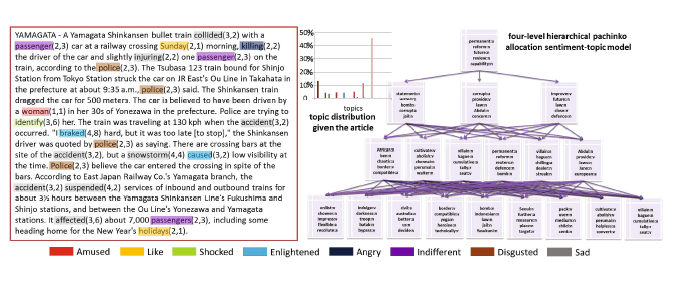

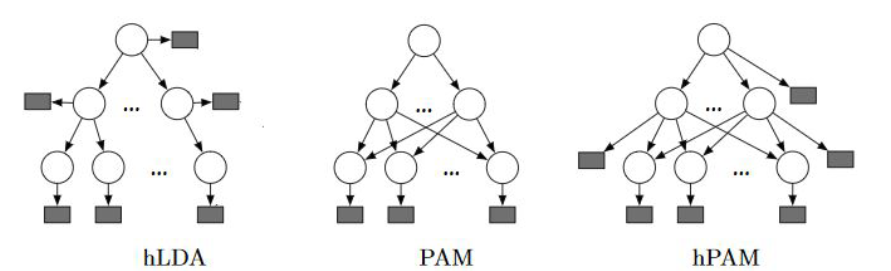

In [2]:
import tomotopy as tp
from collections import Counter

file_name = 'U.S.Patents.txt'

mdl = tp.HPAModel(k1=5, k2=100, min_cf=100, rm_top=200)
for line in open(file_name, 'r'):
    document = line.strip().split()
    mdl.add_doc(document)
        
print('Starting training model')
iterations = 10
for i in range(0, 100, iterations):
    mdl.train(iterations)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))        
        
root_index = 0
words = mdl.get_topic_words(root_index, top_n=30)
print('Root Topic #%s' % root_index)
print('Top 10 words of Root Topic #%s: %r' % (root_index, words))

for k in range(1, 1 + mdl.k1):
    words = mdl.get_topic_words(k, top_n=30)
    print('\n\nLevel 1 Topic #%s' % k)
    print('    Top 10 words of Level 1 Topic #%s: %r' % (k, words))
    
for k in range(1 + mdl.k1, 1 + mdl.k1 + mdl.k2):
    words = mdl.get_topic_words(k, top_n=30)
    print('\n\nLevel 2 Topic #%s' % (k - mdl.k1, ))
    print('    Top 10 words of Level 2 Topic #%s: %r' % (k - mdl.k1, words))    
 

Starting training model
Iteration: 0	Log-likelihood: -9.29273596760521
Iteration: 10	Log-likelihood: -9.005775007773694
Iteration: 20	Log-likelihood: -8.900160558904547
Iteration: 30	Log-likelihood: -8.832382439309287
Iteration: 40	Log-likelihood: -8.780468047655253
Iteration: 50	Log-likelihood: -8.743217145822394
Iteration: 60	Log-likelihood: -8.71999067889431
Iteration: 70	Log-likelihood: -8.704715089388808
Iteration: 80	Log-likelihood: -8.692671122399892
Iteration: 90	Log-likelihood: -8.66981654732192
Root Topic #0
Top 10 words of Root Topic #0: [("'substantially',", 0.025229861959815025), ("'hole',", 0.024399960413575172), ("'opposite',", 0.024233980104327202), ("'interior',", 0.023819027468562126), ("'width',", 0.022989125922322273), ("'mounting',", 0.022408194839954376), ("'aperture',", 0.019669516012072563), ("'extends',", 0.019586525857448578), ("'mounted',", 0.018424661830067635), ("'shape',", 0.01709681749343872), ("'attached',", 0.016349906101822853), ("'away',", 0.015685984